In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import table
from collections import Counter
import numpy as np
import scipy as sp
%matplotlib inline

import importlib
import utilities
importlib.reload(utilities)
from utilities import Util

## Read Data

In [2]:
raw_data = pd.read_csv("ic50.csv", sep=";", usecols=["Molecule ChEMBL ID", "Smiles", "Standard Value", "Assay ChEMBL ID",
                                                                "Standard Units", "Target ChEMBL ID", 
                                                                "Standard Relation", "Target Name"])
targets = pd.read_csv("targets-list.csv", usecols=["CHEMBLID"])

In [3]:
raw_data.head()

,Molecule ChEMBL ID,Smiles,Standard Relation,Standard Value,Standard Units,Assay ChEMBL ID,Target ChEMBL ID,Target Name
0,CHEMBL102714,Cn1cc(C2=C(c3ccc(Cl)cc3Cl)C(=O)NC2=O)c2ccccc21,'=',793579.72,nM,CHEMBL2363758,CHEMBL1075399,BHY
1,CHEMBL3685716,Cc1[nH]nc(N)c1-c1nc2cc(C(F)(F)F)ccc2s1,'=',2800.00,nM,CHEMBL3734121,CHEMBL5247,Serine/threonine-protein kinase ILK-1
2,CHEMBL3319276,CS(=O)(=O)c1ccc2nc(NC(=O)NC(=O)c3ccccc3Cl)sc2c1,'=',120.00,nM,CHEMBL3373238,CHEMBL4616,Ghrelin receptor
3,CHEMBL4515463,Cc1ccc(-c2cc(C(=O)N3CCSCC3)nn2-c2ccc(S(N)(=O)=...,'=',890.00,nM,CHEMBL4347182,CHEMBL230,Cyclooxygenase-2
4,CHEMBL309357,CN(C)CCOC1(c2ccccc2)CC2CCC1(C)C2(C)C,'=',26000.00,nM,CHEMBL806333,CHEMBL1903,GABA transporter 1


In [4]:
raw_data.shape

(1541957, 8)

In [5]:
targets

,CHEMBLID
0,CHEMBL203
1,CHEMBL1957
2,CHEMBL4026
3,CHEMBL2842
4,CHEMBL2364164
5,CHEMBL1910
6,CHEMBL203
7,CHEMBL1955
8,CHEMBL3474
9,CHEMBL614725


### Update data to only contain targets listed above

In [6]:
targets_ids = targets["CHEMBLID"].tolist()

In [7]:
## Filter data by targets and Standard units
cancer_data =raw_data.loc[raw_data['Standard Units'] == 'nM']
cancer_data = cancer_data.loc[(cancer_data['Target ChEMBL ID'].isin(targets_ids)) ]

In [8]:
num_of_targets_found = len(set(cancer_data["Target Name"].tolist()))
print("Targets found = {}".format(num_of_targets_found))

Targets found = 11


In [9]:
cancer_data.shape

(26841, 8)

## Describing Data

In [10]:
print("Refactored data has {} rows and {} columns.".format(cancer_data.shape[0], cancer_data.shape[1]))

#cancer_data.to_csv('EDA-data.csv')

Refactored data has 26841 rows and 8 columns.


In [11]:
# Nan values
print("Columns which have empty values: \n\n{} ".format(cancer_data.isna().sum()))

Columns which have empty values: 

Molecule ChEMBL ID    0
Smiles                8
Standard Relation     0
Standard Value        0
Standard Units        0
Assay ChEMBL ID       0
Target ChEMBL ID      0
Target Name           0
dtype: int64 


### 1. Explore column Standard Value

<AxesSubplot:ylabel='Density'>

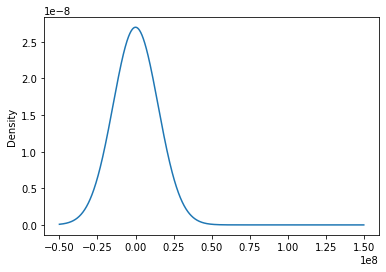

In [12]:
## Distribution of Standard Value by using kernal density estimation

(cancer_data["Standard Value"]).plot.kde(bw_method=15)

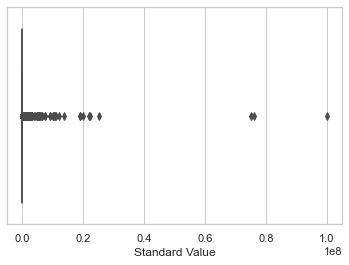

In [13]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=cancer_data["Standard Value"])

In [14]:
targets_ids = set(cancer_data["Target ChEMBL ID"].tolist())
targets_ids

{'CHEMBL1910',
 'CHEMBL1955',
 'CHEMBL1957',
 'CHEMBL203',
 'CHEMBL209',
 'CHEMBL2189121',
 'CHEMBL2842',
 'CHEMBL3474',
 'CHEMBL3580494',
 'CHEMBL4026',
 'CHEMBL614725'}

In [15]:
util_fn = Util(cancer_data, targets_ids)
util_fn.set_target_dict()

{'CHEMBL3580494': {'percentiles': [], 25: 0, 50: 0, 75: 0, 100: 0},
 'CHEMBL209': {'percentiles': [], 25: 0, 50: 0, 75: 0, 100: 0},
 'CHEMBL2189121': {'percentiles': [], 25: 0, 50: 0, 75: 0, 100: 0},
 'CHEMBL1910': {'percentiles': [], 25: 0, 50: 0, 75: 0, 100: 0},
 'CHEMBL2842': {'percentiles': [], 25: 0, 50: 0, 75: 0, 100: 0},
 'CHEMBL3474': {'percentiles': [], 25: 0, 50: 0, 75: 0, 100: 0},
 'CHEMBL1957': {'percentiles': [], 25: 0, 50: 0, 75: 0, 100: 0},
 'CHEMBL614725': {'percentiles': [], 25: 0, 50: 0, 75: 0, 100: 0},
 'CHEMBL4026': {'percentiles': [], 25: 0, 50: 0, 75: 0, 100: 0},
 'CHEMBL1955': {'percentiles': [], 25: 0, 50: 0, 75: 0, 100: 0},
 'CHEMBL203': {'percentiles': [], 25: 0, 50: 0, 75: 0, 100: 0}}

In [16]:
cancer_data.describe(percentiles = [0.25, 0.5, 0.75])

,Standard Value
count,2.684100e+04
mean,3.849805e+04
std,9.849502e+05
min,1.300000e-03
25%,2.800000e+01
50%,2.850000e+02
75%,5.600000e+03
max,1.000000e+08


In [17]:
targets_dict = util_fn.set_percentile_count()
targets_dict['CHEMBL203']

{'percentiles': [0.003, 23.0, 257.0, 5010.9349999999995, 25000000.0],
 25: 3267,
 50: 3208,
 75: 3232,
 100: 3236}

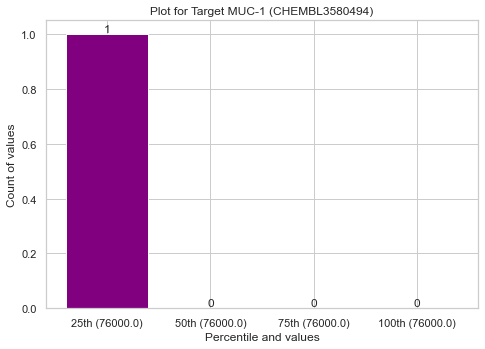

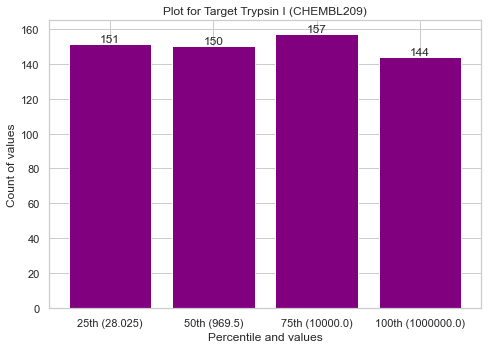

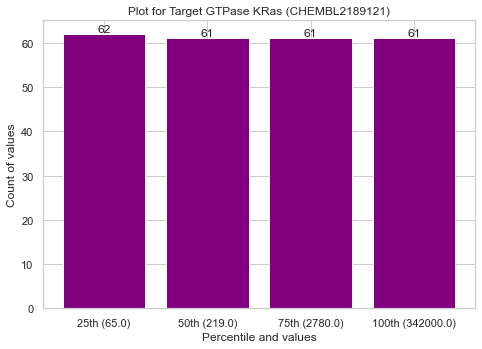

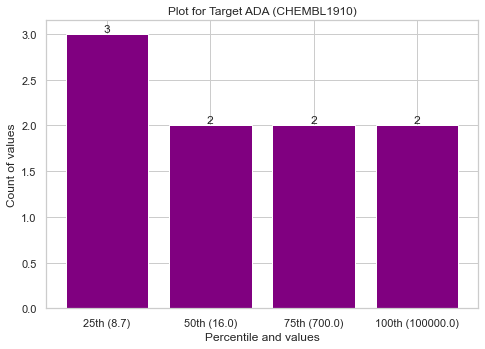

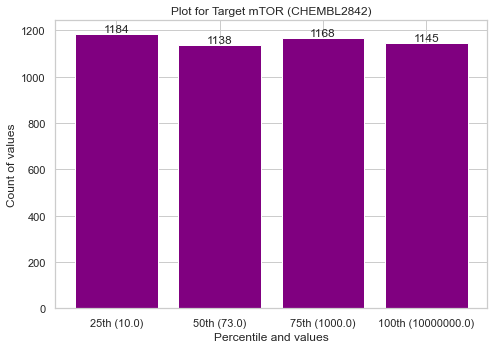

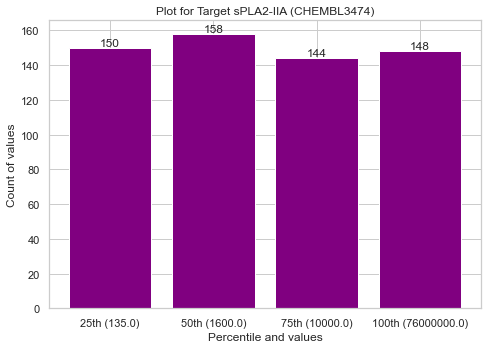

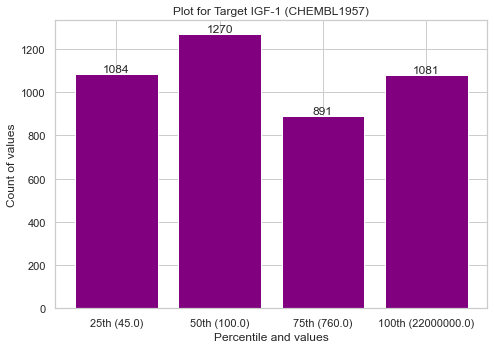

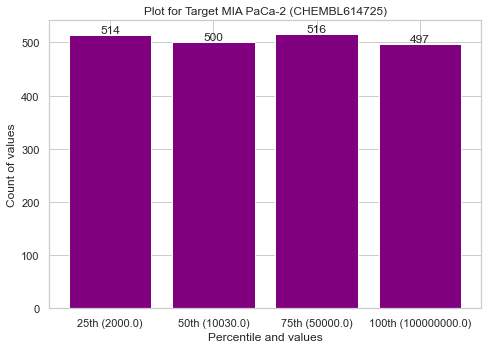

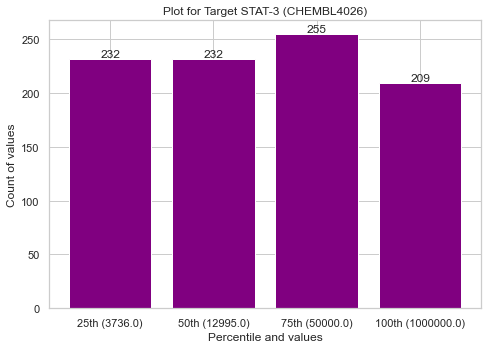

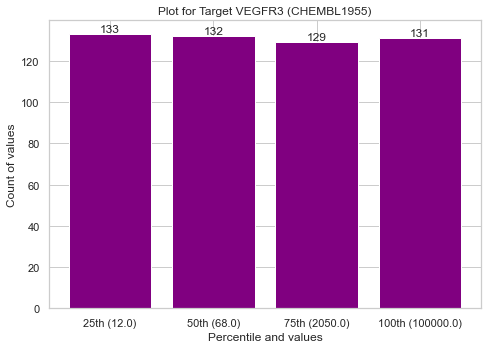

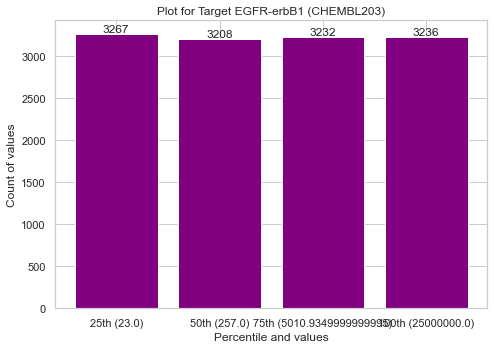

In [18]:
for target in targets_dict:
    fig = plt.figure(figsize=(6, 4))
    ax = fig.add_axes([0,0,1,1])
    percentiles = targets_dict[target]["percentiles"]
    x_axis = ['25th ({})'.format(percentiles[1]), '50th ({})'.format(percentiles[2]), 
              '75th ({})'.format(percentiles[3]), '100th ({})'.format(percentiles[4])]
    y_axis = [targets_dict[target][25],targets_dict[target][50],
                targets_dict[target][75],targets_dict[target][100]]

    
    ax.bar(x_axis,y_axis, color='purple')
    for i in range(len(y_axis)):
        plt.annotate(str(y_axis[i]), xy=(x_axis[i],y_axis[i]), ha='center', va='bottom')

    
    plt.xlabel("Percentile and values")
    plt.ylabel("Count of values")
    plt.title("Plot for Target {} ({})".format(util_fn.target_abbr_from_id(target), target))
    plt.show()

### 2. Explore column Standard Units

In [19]:
#List the standard units used in the dataset

sv_units = set(cancer_data["Standard Units"].tolist())
print("All standard value units, {}".format(sv_units))

### Comment: We will convert the values to have the same units and remove activities with units = nan

All standard value units, {'nM'}


### 3. Explore column Target CHEMBL ID

In [20]:
cancer_data['Target ChEMBL ID'].value_counts()

CHEMBL203        12943
CHEMBL2842        4635
CHEMBL1957        4326
CHEMBL614725      2027
CHEMBL4026         928
CHEMBL209          602
CHEMBL3474         600
CHEMBL1955         525
CHEMBL2189121      245
CHEMBL1910           9
CHEMBL3580494        1
Name: Target ChEMBL ID, dtype: int64

In [21]:
cancer_data["T_COUNT"] = 1

In [22]:
sum_target = cancer_data.groupby(['Target Name','Target ChEMBL ID'])["T_COUNT"].sum()
sum_vals = sum_target.tolist()
sum_index = sum_target.index.tolist()
indices = []
for i in sum_index:

    indices.append(util_fn.target_abbr_from_id(i[1]))

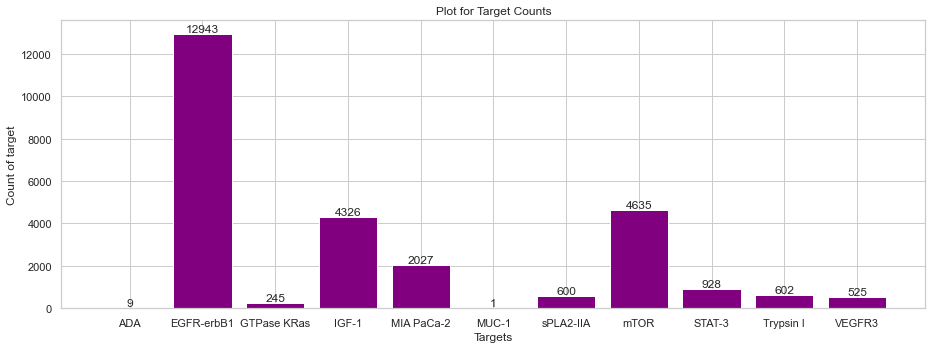

In [25]:
fig = plt.figure(figsize=(12, 4))
ax = fig.add_axes([0,0,1,1])
x_axis = indices
y_axis = sum_vals

    
ax.bar(x_axis,y_axis, color="purple")
for i in range(len(y_axis)):
    plt.annotate(str(y_axis[i]), xy=(x_axis[i],y_axis[i]), ha='center', va='bottom')

    
plt.xlabel("Targets")
plt.ylabel("Count of target")
plt.title("Plot for Target Counts")
plt.show()

### 4. Explore column Molecule CHEMBL ID

In [26]:
compounds_vc = cancer_data['Molecule ChEMBL ID'].value_counts()

In [27]:
compounds_vc

CHEMBL939        171
CHEMBL553        108
CHEMBL3353410     96
CHEMBL1173655     48
CHEMBL554         45
                ... 
CHEMBL3646527      1
CHEMBL1385084      1
CHEMBL3919145      1
CHEMBL3753904      1
CHEMBL2172477      1
Name: Molecule ChEMBL ID, Length: 18902, dtype: int64

#### Total 18902 compounds

#### Graph of compounds value count

<Figure size 1000x500 with 0 Axes>

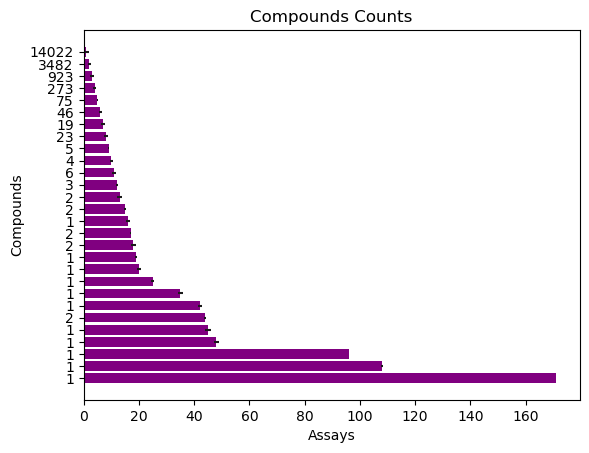

In [29]:
compounds_count = compounds_vc.value_counts().sort_index().index.tolist()
activities_count = compounds_vc.value_counts().sort_index().values.tolist()
fig = plt.figure(figsize = (10, 5)) 
  

plt.rcdefaults()
fig, ax = plt.subplots()

y_pos = np.arange(len(activities_count))
error = np.random.rand(len(activities_count))

ax.barh(y_pos, compounds_count, xerr=error, align='center', color="purple")
ax.set_yticks(y_pos)
ax.set_yticklabels(activities_count)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Assays')
ax.set_ylabel('Compounds')
ax.set_title('Compounds Counts')

plt.show()

### 5. Explore Standard Relation

In [30]:
# Look for values used in Standard Relation
sr_values = set(cancer_data["Standard Relation"].tolist())
print("All standard relation values, {}".format(sr_values))

All standard relation values, {"'>='", "'<'", "'>>'", "'>'", "'<='", "'~'", "'='"}


### 6. Explore Molecule and Target Interactions

In [92]:
cancer_data['COUNTER'] =1 
group_data = cancer_data.groupby(['Molecule ChEMBL ID','Target ChEMBL ID'])['COUNTER'].sum()
interaction_count = group_data.value_counts().sort_index().index.tolist()
interaction_vals = group_data.value_counts().sort_index().values.tolist()



<Figure size 1000x500 with 0 Axes>

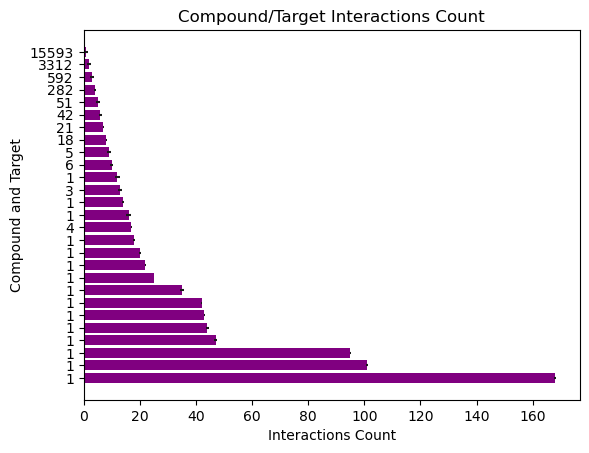

In [102]:
fig = plt.figure(figsize = (10, 5)) 
  

plt.rcdefaults()
fig, ax = plt.subplots()

y_pos = np.arange(len(interaction_vals))
error = np.random.rand(len(interaction_vals))

ax.barh(y_pos, interaction_count, xerr=error, align='center', color="purple")
ax.set_yticks(y_pos)
ax.set_yticklabels(interaction_vals)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Interactions Count')
ax.set_ylabel('Compound and Target')
ax.set_title('Compound/Target Interactions Count')

plt.show()

#### Find out targets with interaction count more than 20

In [94]:
target_mol_inter = group_data.to_frame()
counter_values = target_mol_inter[target_mol_inter['COUNTER'] >= 7]
list_interactions = list(set(counter_values.index)) 
a_list = [a_tuple[1:] for a_tuple in list_interactions]

targets = []

for t in set(a_list):
    targets.append(t[0])

print('Targets with greater than 7 interactions are \n\n{} '.format(targets))

Targets with greater than 7 interactions are 

['CHEMBL1955', 'CHEMBL203', 'CHEMBL2842', 'CHEMBL1957', 'CHEMBL3474', 'CHEMBL614725', 'CHEMBL4026'] 


In [95]:
cancer_data.head()

,Molecule ChEMBL ID,Smiles,Standard Relation,Standard Value,Standard Units,Assay ChEMBL ID,Target ChEMBL ID,Target Name,T_COUNT,COUNTER
5,CHEMBL1374198,CCC(C(=O)Nc1ccccc1)N1CCN(S(=O)(=O)c2ccc3c(c2)C...,'>',55690.00,nM,CHEMBL1614253,CHEMBL4026,Signal transducer and activator of transcripti...,1,1
282,CHEMBL4465103,C=CC(=O)Nc1cc(Nc2nccc(Nc3ccccc3P(C)(C)=O)n2)c(...,'=',149.00,nM,CHEMBL4382298,CHEMBL203,Epidermal growth factor receptor erbB1,1,1
297,CHEMBL3931669,CNc1nc2ccccc2n1-c1nc2c(c(C(C)(C)S(C)(=O)=O)n1)...,'=',588.00,nM,CHEMBL3889163,CHEMBL2842,Serine/threonine-protein kinase mTOR,1,1
350,CHEMBL3355875,COc1cc2ncnc(Nc3ccc(F)c(Cl)c3)c2cc1OCCCCn1ccnc1...,'=',0.47,nM,CHEMBL3372999,CHEMBL203,Epidermal growth factor receptor erbB1,1,1
524,CHEMBL4224812,C=CC(=O)Nc1cccc(NC(=O)N(C)c2ccnc(Nc3ccc(N4CCN(...,'>',1000.00,nM,CHEMBL4222198,CHEMBL203,Epidermal growth factor receptor erbB1,1,1


In [96]:
cancer_data.to_csv("data_eda.csv")